In [25]:
from classes.data_handler import DataHandler
from classes.siamese_nn import SiameseNN
from classes.nn_network import NNNetwork
from classes.base_model import BaseModel
from classes.transfer_learning import TransferLearning
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
image_gen_params = {
'rotation_range' : 30,
'width_shift_range' : 0.3,
'height_shift_range' : 0.3,
'shear_range' : 0.3,
'horizontal_flip' : True,
'vertical_flip' : True,
'fill_mode': 'nearest',
'zoom_range' : 0.2
 }


dh = DataHandler()
dh.load_data()
dh.augment_data(use_train = True, c_04567 = True, N = 1000, visualize = False, **image_gen_params)
#dh.augment_data(use_train = True, c_04567 = False, N = 2, visualize = False, **image_gen_params)

# Siamese NN

In [40]:
sh = SiameseNN(dh)
sh.create_pairs()
sh.define_model_structure()
sh.train_model(nb_epoch = 10, load_model = True)

Number of training pairs is 6993 
Number of val pairs is 2997 


D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\siamese_nn.py:95: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  self.model = Model(input=[input_a, input_b], output=flattened_weighted_distance)


In [36]:
sh.compute_verification_accuracy()

* Accuracy of classifying the val set: 97.56%


In [103]:
accs_at_level = sh.compute_one_shot_accuracy(max_acc_level = 5)
sh.plot_confusion_matrix(normalize=True)

(5000, 5)
*Accuracy of classifying the test set at level 1: 39.08%
*Accuracy of classifying the test set at level 2: 52.16%
*Accuracy of classifying the test set at level 3: 63.52%
*Accuracy of classifying the test set at level 4: 84.42%
*Accuracy of classifying the test set at level 5: 100.00%


# Base model trained on 04567

In [27]:
bm_04567 = BaseModel(dh, c_04567 = True)

In [167]:
bm_04567.compute_accuracy(max_acc_level = 3)

*Accuracy of classifying the test set at level 1: 57.64%
*Accuracy of classifying the test set at level 2: 78.22%
*Accuracy of classifying the test set at level 3: 87.90%


Normalized confusion matrix
[[ 0.73  0.14  0.01  0.1   0.01]
 [ 0.47  0.41  0.    0.12  0.  ]
 [ 0.01  0.    0.64  0.12  0.23]
 [ 0.58  0.18  0.    0.24  0.  ]
 [ 0.01  0.    0.12  0.01  0.86]]


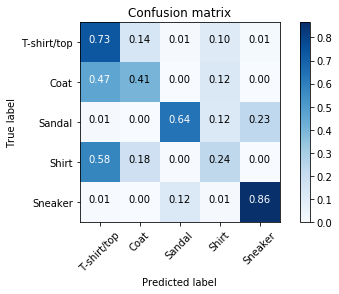

In [168]:
bm_04567.plot_confusion_matrix(normalize = True)

### Hyperparam optimization

In [32]:
bm_04567.hyper_param_tuning()

Hyper param uning
Tuning
Epoch 1/1
5000/5000 [==============================] - 10s - loss: 0.8509 - acc: 0.6316    
Test accuracy: 0.5552
Tuning
Epoch 1/1
5000/5000 [==============================] - 9s - loss: 0.9598 - acc: 0.6062     
Test accuracy: 0.5084
Tuning
Epoch 1/1
5000/5000 [==============================] - 9s - loss: 0.9608 - acc: 0.5910     
Test accuracy: 0.4018
Tuning
Epoch 1/1
5000/5000 [==============================] - 9s - loss: 0.9838 - acc: 0.5758     
Test accuracy: 0.552
Tuning
Epoch 1/1
5000/5000 [==============================] - 9s - loss: 0.9091 - acc: 0.6086     
Test accuracy: 0.4928


{'dropout1': 0.4505308370312296}

Next. 
- Base model vs transfer learning. 
- model ensemble


# Transfer learning

## Training base model on 12389

In [178]:
bm_12389 = BaseModel(dh, c_04567 = False)
bm_12389.define_model_structure()
bm_12389.train_model(nb_epoch = 5, model_name = 'base_12389.h5')

Epoch 1/5
60000/60000 [==============================] - 172s - loss: 0.7730 - acc: 0.7051   
Epoch 2/5
60000/60000 [==============================] - 163s - loss: 0.4554 - acc: 0.8417   
Epoch 3/5
60000/60000 [==============================] - 163s - loss: 0.3738 - acc: 0.8724   
Epoch 4/5
60000/60000 [==============================] - 173s - loss: 0.3265 - acc: 0.8893   
Epoch 5/5
60000/60000 [==============================] - 175s - loss: 0.2980 - acc: 0.8989   


*Accuracy of classifying the test set at level 1: 94.88%
*Accuracy of classifying the test set at level 2: 99.16%
*Accuracy of classifying the test set at level 3: 99.72%
Normalized confusion matrix
[[ 0.97  0.    0.02  0.    0.  ]
 [ 0.    0.97  0.02  0.01  0.  ]
 [ 0.05  0.08  0.86  0.01  0.  ]
 [ 0.    0.02  0.01  0.97  0.  ]
 [ 0.    0.    0.    0.03  0.96]]


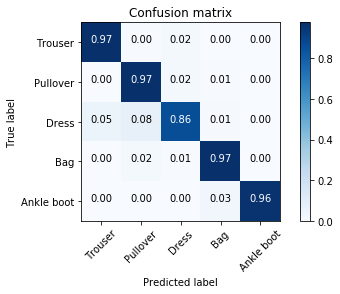

In [180]:
bm_12389.compute_accuracy(max_acc_level = 3)
bm_12389.plot_confusion_matrix(normalize = True)

## Applying transfer learning on 04567

In [188]:
tl = TransferLearning(dh, c_04567 = True)
tl.define_model_structure(bm_12389.model)
tl.train_model(nb_epoch = 5)

D:\Google Drive\TUe\PDEng\Modules\Data Mining\CodeExampleAndFashionDataset\classes\transfer_learning.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("so...)`
  self.model = Model(input=base_model.input, output=predictions)


Training on 5000 isntances of data.
Epoch 1/5
5000/5000 [==============================] - 5s - loss: 0.2318 - acc: 0.9372     
Epoch 2/5
5000/5000 [==============================] - 5s - loss: 0.0286 - acc: 0.9962     
Epoch 3/5
5000/5000 [==============================] - 5s - loss: 0.0130 - acc: 0.9970     
Epoch 4/5
5000/5000 [==============================] - 5s - loss: 0.0068 - acc: 0.9988     
Epoch 5/5
5000/5000 [==============================] - 4s - loss: 0.0041 - acc: 0.9992     


*Accuracy of classifying the test set at level 1: 58.58%
*Accuracy of classifying the test set at level 2: 80.78%
*Accuracy of classifying the test set at level 3: 90.66%
Normalized confusion matrix
[[ 0.75  0.11  0.01  0.13  0.01]
 [ 0.59  0.2   0.    0.2   0.  ]
 [ 0.    0.    0.73  0.04  0.23]
 [ 0.57  0.11  0.    0.32  0.  ]
 [ 0.    0.    0.05  0.01  0.93]]


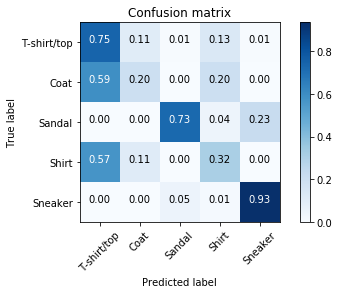

In [189]:
tl.compute_accuracy(max_acc_level = 3)
tl.plot_confusion_matrix(normalize = True)